 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Initialize CONSTANTS in all caps as a convention
TRADING_DAYS = 252

In [3]:
# Create a function to read a csv file and return a DataFrame
# Optionally, report and clean nulls
def load_csv_to_df(path_to_csv, report_nulls=True, dropnulls=True):
    # check that the file exists so that we don't crash
    try:
        csv_file = Path(path_to_csv)
        df_obj = pd.read_csv(csv_file, index_col='Date', infer_datetime_format=True, parse_dates=True)
        if report_nulls:
            print(f"Nulls found:\n--------------------------------\n{df_obj.isna().sum()}\n--------------------------------")
        if dropnulls:
            df_obj.dropna(inplace=True)
            print("All null values removed!")
        return df_obj
    except FileNotFoundError:
        print(f"File: {path_to_csv}, not found!")

In [4]:
# Reading whale returns
whale_df = load_csv_to_df('./Resources/whale_returns.csv')

Nulls found:
--------------------------------
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
--------------------------------
All null values removed!


In [5]:
# Count nulls
# whale_df.isna().sum()

In [6]:
# Drop nulls
# whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_df = load_csv_to_df('./Resources/algo_returns.csv')

Nulls found:
--------------------------------
Algo 1    0
Algo 2    6
dtype: int64
--------------------------------
All null values removed!


In [8]:
# Count nulls
# algo_df.isna().sum()

In [9]:
# Drop nulls
# algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = load_csv_to_df('./Resources/sp_tsx_history.csv')

Nulls found:
--------------------------------
Close    0
dtype: int64
--------------------------------
All null values removed!


In [11]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_tsx_df['Close'].astype('str')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '').str.replace(',', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')
sp_tsx_df.dtypes

/Users/rafinazamodeen/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_tsx_daily_df = sp_tsx_df.pct_change()
sp_tsx_daily_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_daily_df.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_df = sp_tsx_daily_df.rename({'Close':'S&P TSX'}, axis="columns")
sp_tsx_daily_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whale_df, algo_df, sp_tsx_daily_df], axis='columns', join='inner')
all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

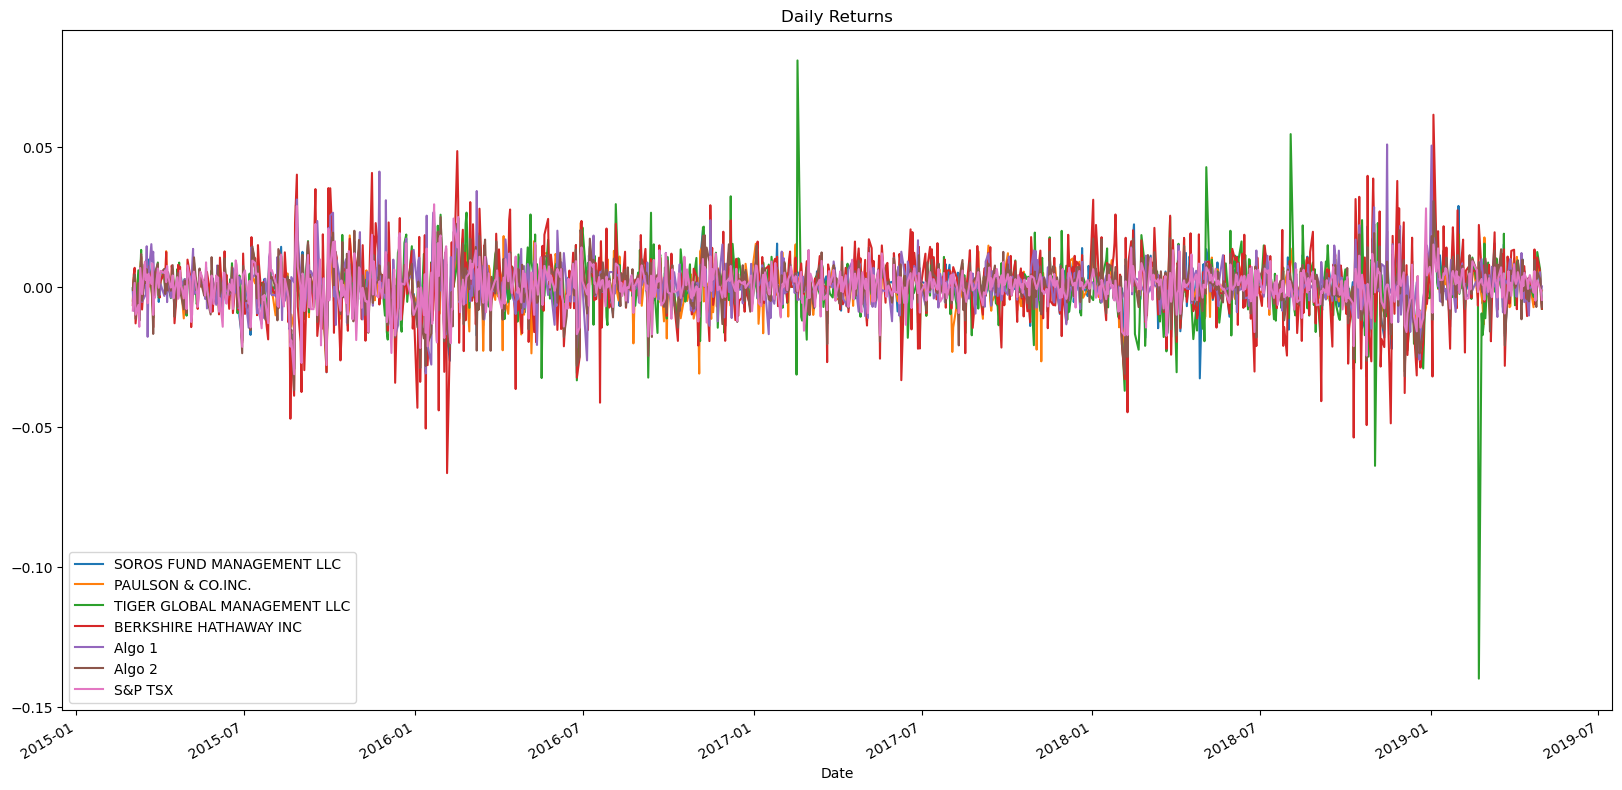

In [17]:
# Plot daily returns of all portfolios
all_returns_df.plot(figsize=(20,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

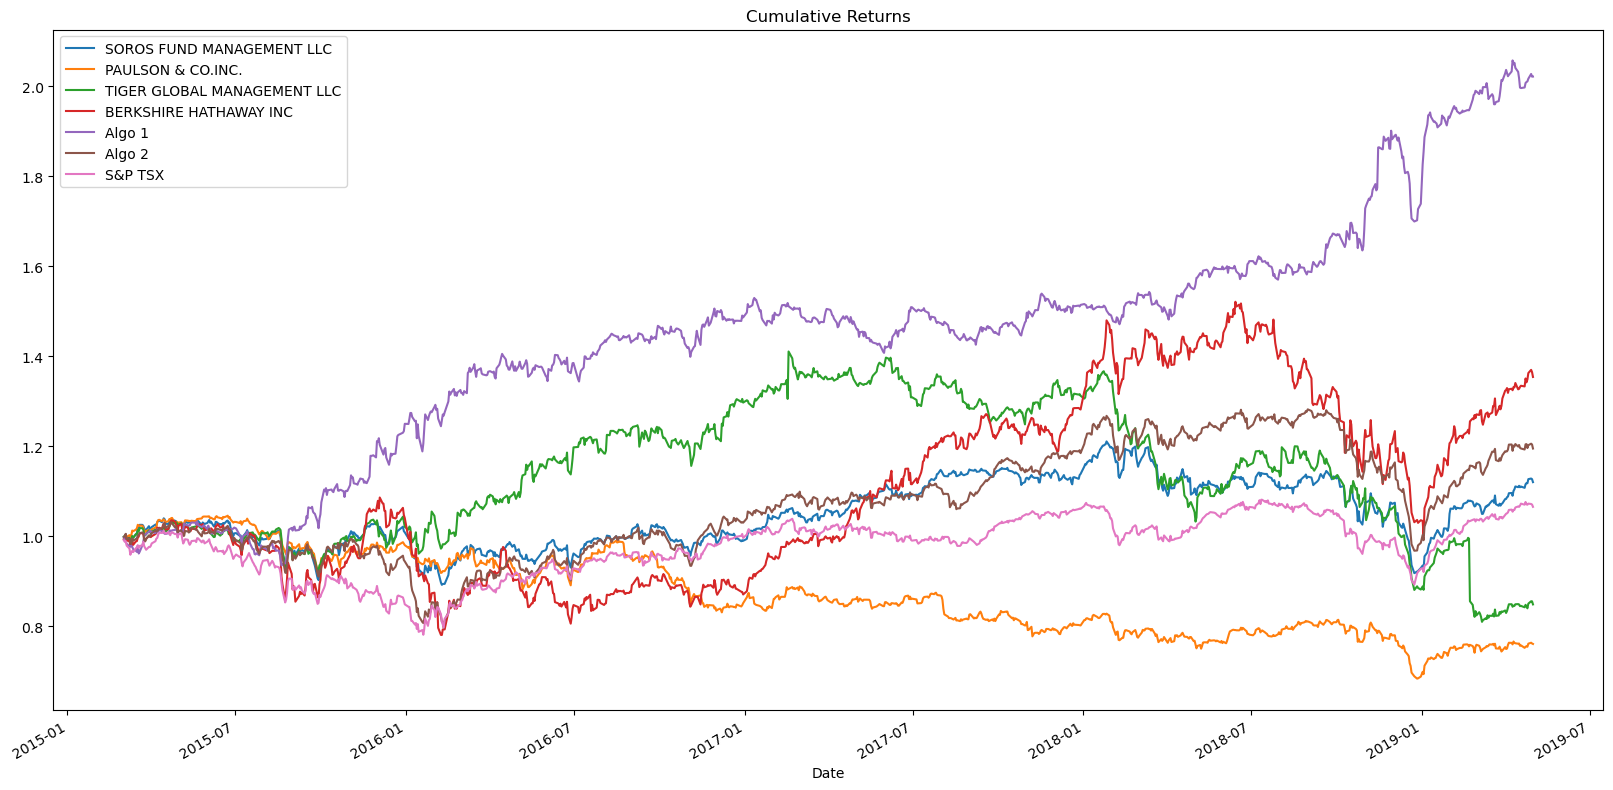

In [18]:
# Calculate cumulative returns of all portfolios
cml_all_returns_df = (1 + all_returns_df).cumprod()
# Plot cumulative returns
cml_all_returns_df.plot(title='Cumulative Returns', figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns'}>

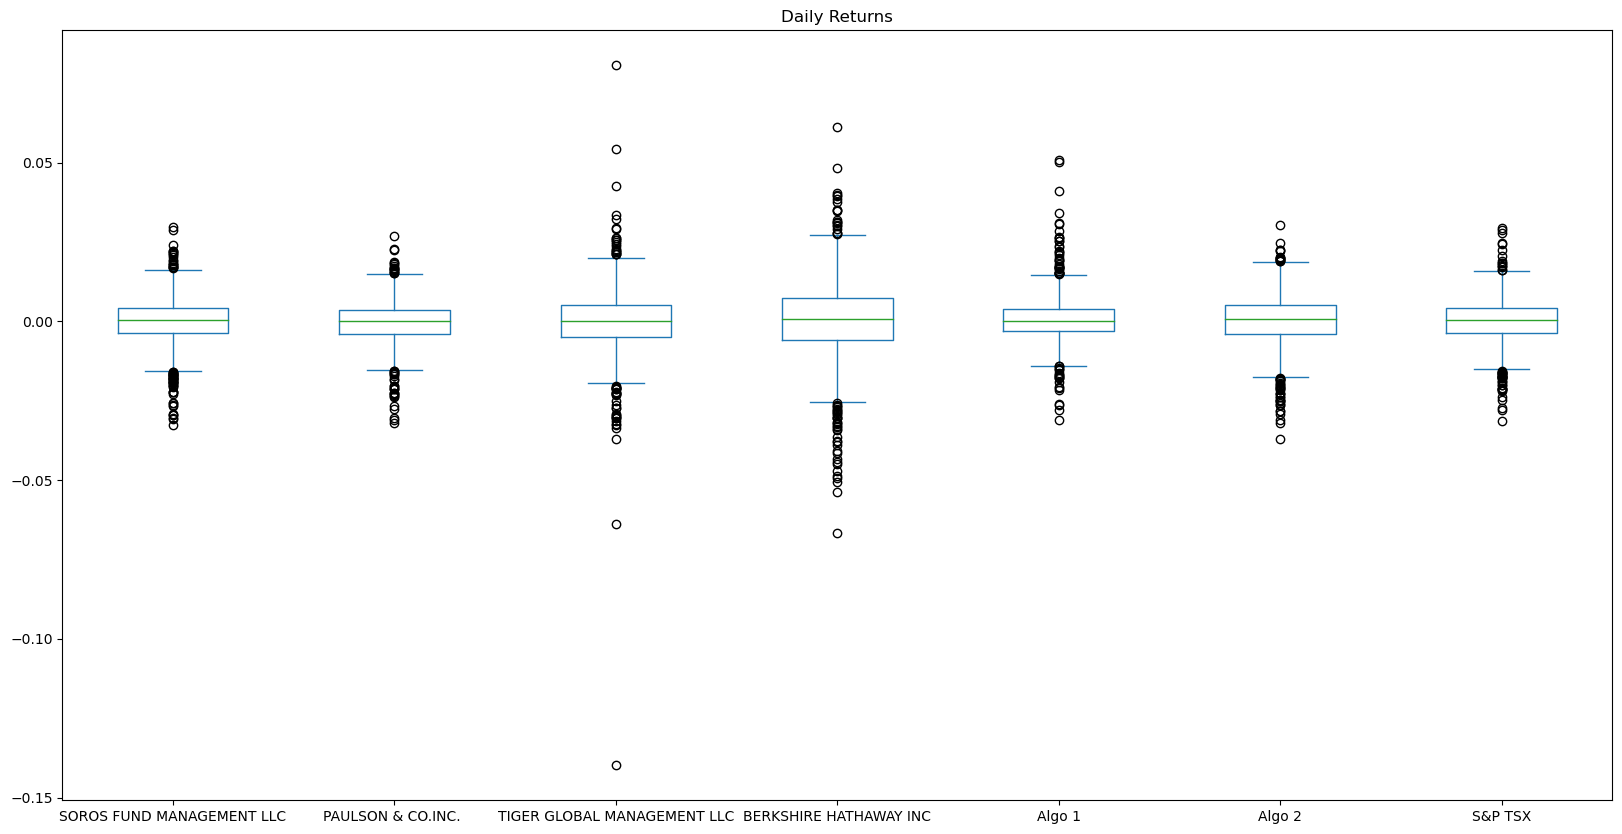

In [19]:
# Box plot to visually show risk
all_returns_df.plot(figsize=(20,10), title='Daily Returns', kind='box')

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
all_returns_df['S&P TSX'].std()
# Determine which portfolios are riskier than the S&P TSX 60
# The position (index) of the portfolios is known so iloc is a simpler choice than loc
all_returns_df.std().iloc[0:-1] > all_returns_df['S&P TSX'].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
all_returns_std_ann_df = all_returns_df.std() * np.sqrt(TRADING_DAYS)
all_returns_std_ann_df

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling STD'}, xlabel='Date'>

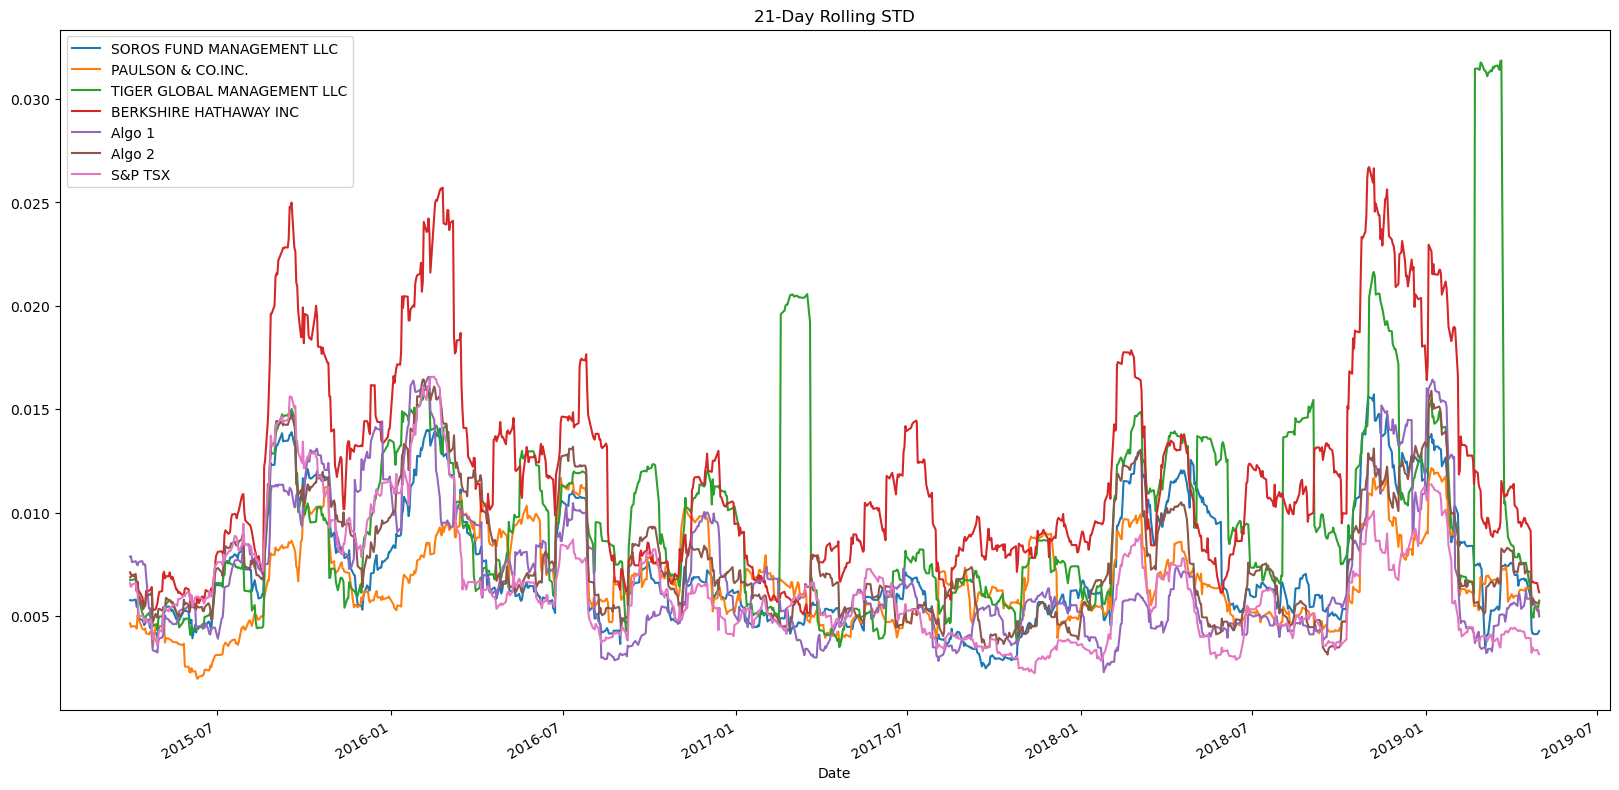

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_std_roll_21_day = all_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
all_returns_std_roll_21_day.plot(figsize=(20,10), title='21-Day Rolling STD')

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
all_returns_corr_df = all_returns_df.corr()
# Display de correlation matrix
all_returns_corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Tiger Beta'}, xlabel='Date'>

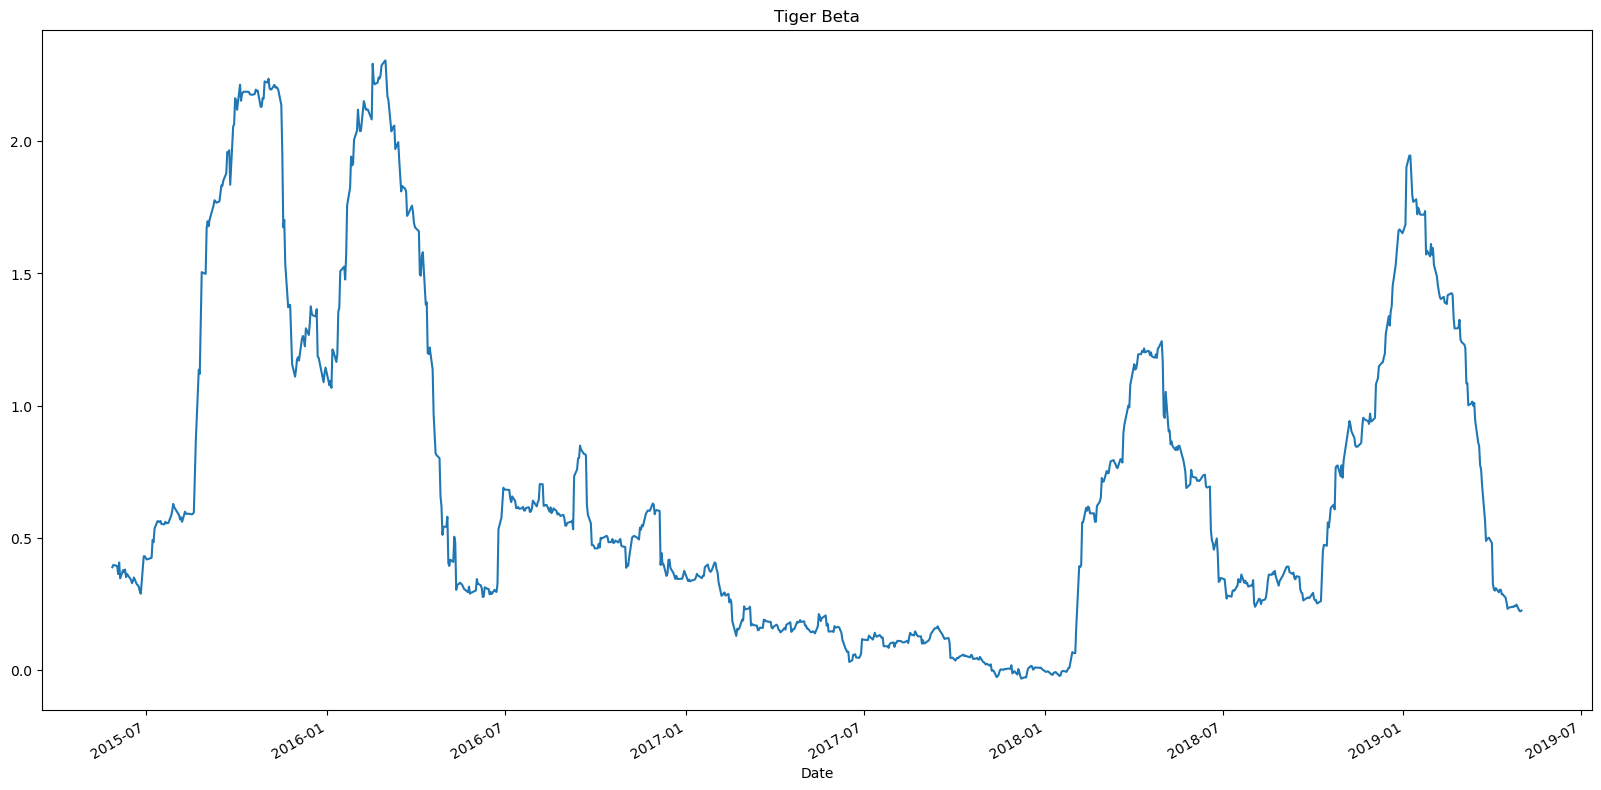

In [25]:
# Calculate covariance of a single portfolio - TIGER
cov_rolling_60day_tiger = all_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(all_returns_df['S&P TSX'])
# Calculate variance of S&P TSX
var_rolling_60day_sp_tsx = all_returns_df['S&P TSX'].var()

# Computing beta
beta_rolling_60day_tiger = cov_rolling_60day_tiger / var_rolling_60day_sp_tsx

# Plot beta trend
beta_rolling_60day_tiger.plot(figsize=(20,10), title='Tiger Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM of All Returns'}, xlabel='Date'>

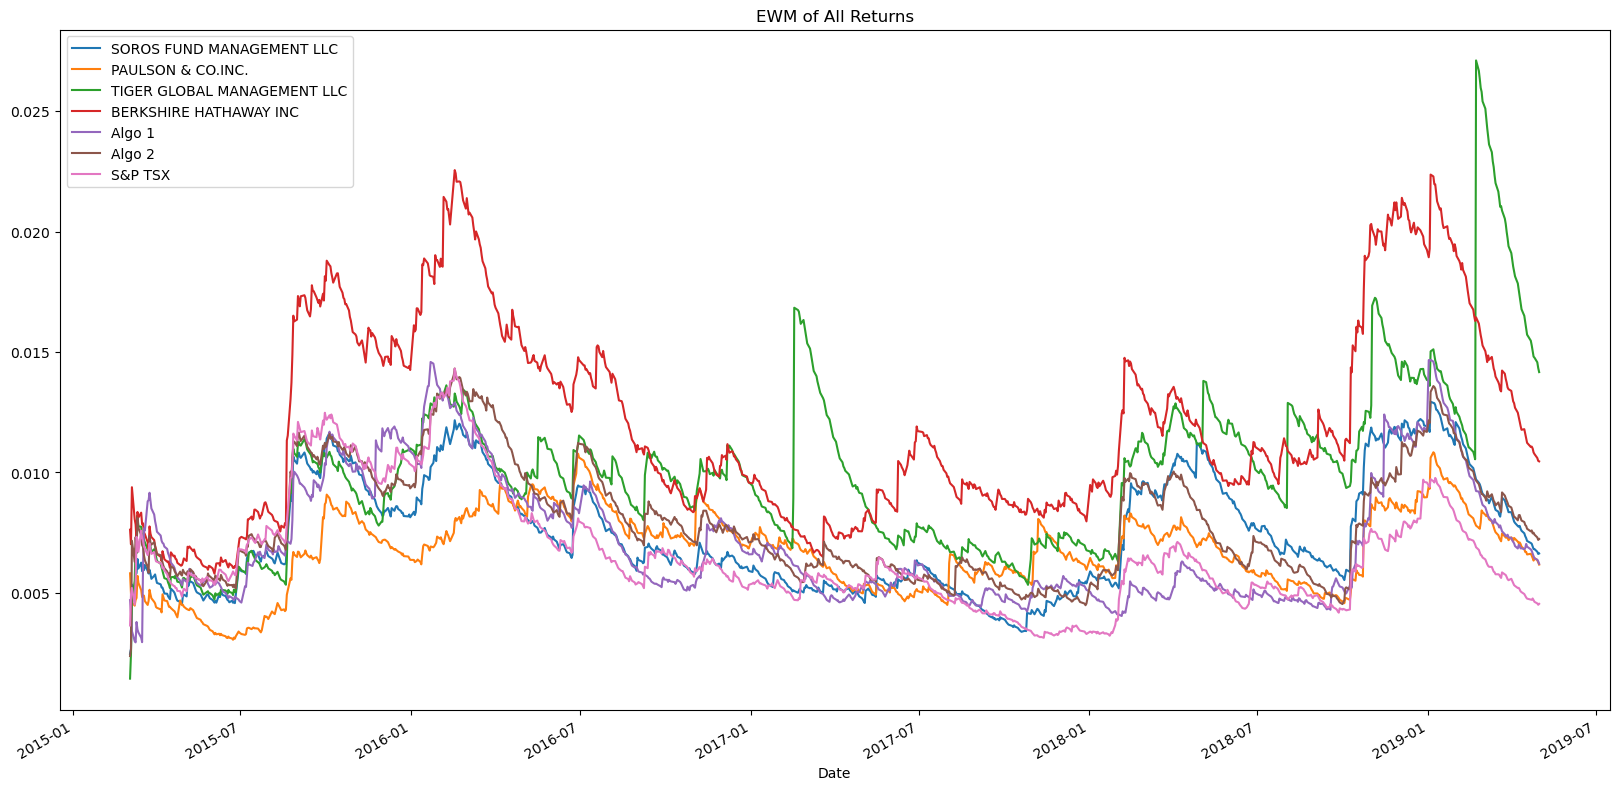

In [26]:
# Use `ewm` to calculate the rolling window
all_returns_ewm_21day_df = all_returns_df.ewm(halflife=21).std()
all_returns_ewm_21day_df.plot(figsize=(20,10), title='EWM of All Returns')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
def sharpe_ratio(data_set, risk_free=[], annualized=True):
    risk_free_rate = pd.DataFrame({'risk_free':[0] * len(data_set)}, index=data_set.index) if not risk_free else risk_free
    # risk_free_rate.index = data_set.index
    all_data = pd.concat([data_set, risk_free_rate], axis='columns', join='inner')
    trading_days = 252 if annualized else 1
    sr = ((all_data.mean() - all_data['risk_free'].mean()) * trading_days) / (data_set.std() * np.sqrt(trading_days))
    sr.drop('risk_free', inplace=True)
    return sr

sharpe_ratios = sharpe_ratio(all_returns_df)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

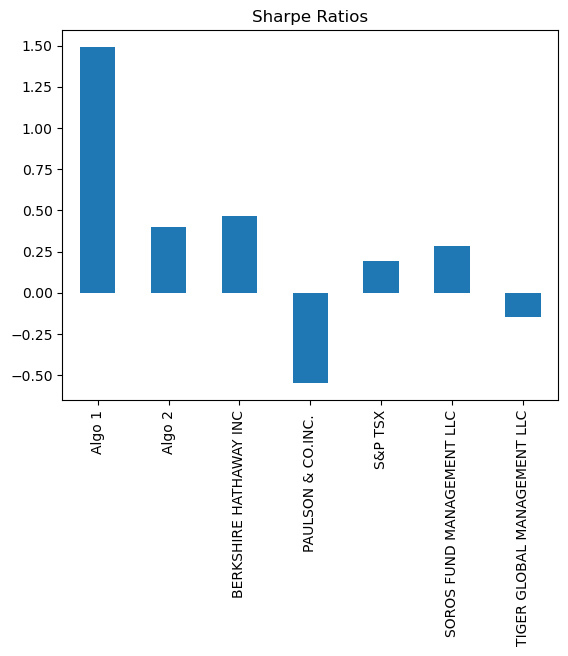

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo1 outperformed all other portfolios. Algo1 had the highest cumulative product, so it's total return was higher than any other portfolio. It has low correlation to the S&P TSX 60 so it is well diversified.

Algo2 had the 3rd highest cumulative return. It is much closer correlated to S&P TSX 60, so it's not as well diversified. Return to risk (Sharpe ratio) is lower than Algo1 and Berkshire. 


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# File locations
# l_csv_file = Path('./Resources/l_historical.csv')
# otex_csv_file = Path('./Resources/otex_historical.csv')
# shop_csv_file = Path('./Resources/shop_historical.csv')
ry_csv_file = Path('./Resources/ry_historical.csv')
td_csv_file = Path('./Resources/td_historical.csv')
cnr_csv_file = Path('./Resources/cnr_historical.csv')

In [30]:
# Reading data from 1st stock
ry_df = load_csv_to_df(ry_csv_file)

Nulls found:
--------------------------------
Symbol    0
Close     0
dtype: int64
--------------------------------
All null values removed!


In [31]:
# Reading data from 2nd stock
td_df = load_csv_to_df(td_csv_file)

Nulls found:
--------------------------------
Symbol    0
Close     0
dtype: int64
--------------------------------
All null values removed!


In [32]:
# Reading data from 3rd stock
cnr_df = load_csv_to_df(cnr_csv_file)

Nulls found:
--------------------------------
Symbol    0
Close     0
dtype: int64
--------------------------------
All null values removed!


In [33]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([ry_df, td_df, cnr_df], axis='rows', join='inner')
stocks_df.head()

,Symbol,Close
Date,,
2018-01-02,RY,102.95
2018-01-03,RY,103.89
2018-01-04,RY,104.89
2018-01-05,RY,104.74
2018-01-08,RY,104.31


In [34]:
# Reset Date index
stocks_df.reset_index()

,Date,Symbol,Close
0,2018-01-02,RY,102.95
1,2018-01-03,RY,103.89
2,2018-01-04,RY,104.89
3,2018-01-05,RY,104.74
4,2018-01-08,RY,104.31
...,...,...,...
1495,2019-12-19,CNR,118.33
1496,2019-12-20,CNR,119.42
1497,2019-12-23,CNR,118.90
1498,2019-12-24,CNR,119.16


In [35]:
# Reorganize portfolio data by having a column per symbol
stocks_df = stocks_df.pivot_table(index='Date', columns='Symbol', values='Close')

stocks_df.head()

Symbol,CNR,RY,TD
Date,,,
2018-01-02,104.19,102.95,102.95
2018-01-03,104.63,103.89,103.89
2018-01-04,105.31,104.89,104.89
2018-01-05,105.41,104.74,104.74
2018-01-08,104.76,104.31,104.31


In [36]:
# Calculate daily returns
stocks_daily_returns = stocks_df.pct_change()
# Drop NAs
stocks_daily_returns.dropna(inplace=True)
# Display sample data
stocks_daily_returns.head()

Symbol,CNR,RY,TD
Date,,,
2018-01-03,0.004223,0.009131,0.009131
2018-01-04,0.006499,0.009626,0.009626
2018-01-05,0.000950,-0.001430,-0.001430
2018-01-08,-0.006166,-0.004105,-0.004105
2018-01-09,-0.000477,0.005081,0.005081


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights equally for the number of stocks in the portfolio
num_stocks = len(stocks_df.columns)
weights = [1 / num_stocks] * num_stocks

# Calculate portfolio return
# Return will be a series, so convert to a DataFrame with column name "My Portfolio"
portfolio_returns = stocks_daily_returns.dot(weights)
portfolio_returns = portfolio_returns.to_frame()
portfolio_returns.rename(columns={0:'My Portfolio'}, inplace=True)
# Display sample data
portfolio_returns.head()

,My Portfolio
Date,
2018-01-03,0.007495
2018-01-04,0.008583
2018-01-05,-0.000637
2018-01-08,-0.004792
2018-01-09,0.003228


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df = pd.concat([all_returns_df, portfolio_returns], axis='columns', join='inner')
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.007495
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.008583
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.000637
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.004792
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.003228


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
combined_returns_df.std() * np.sqrt(TRADING_DAYS)

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
My Portfolio                   0.121727
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling STD'}, xlabel='Date'>

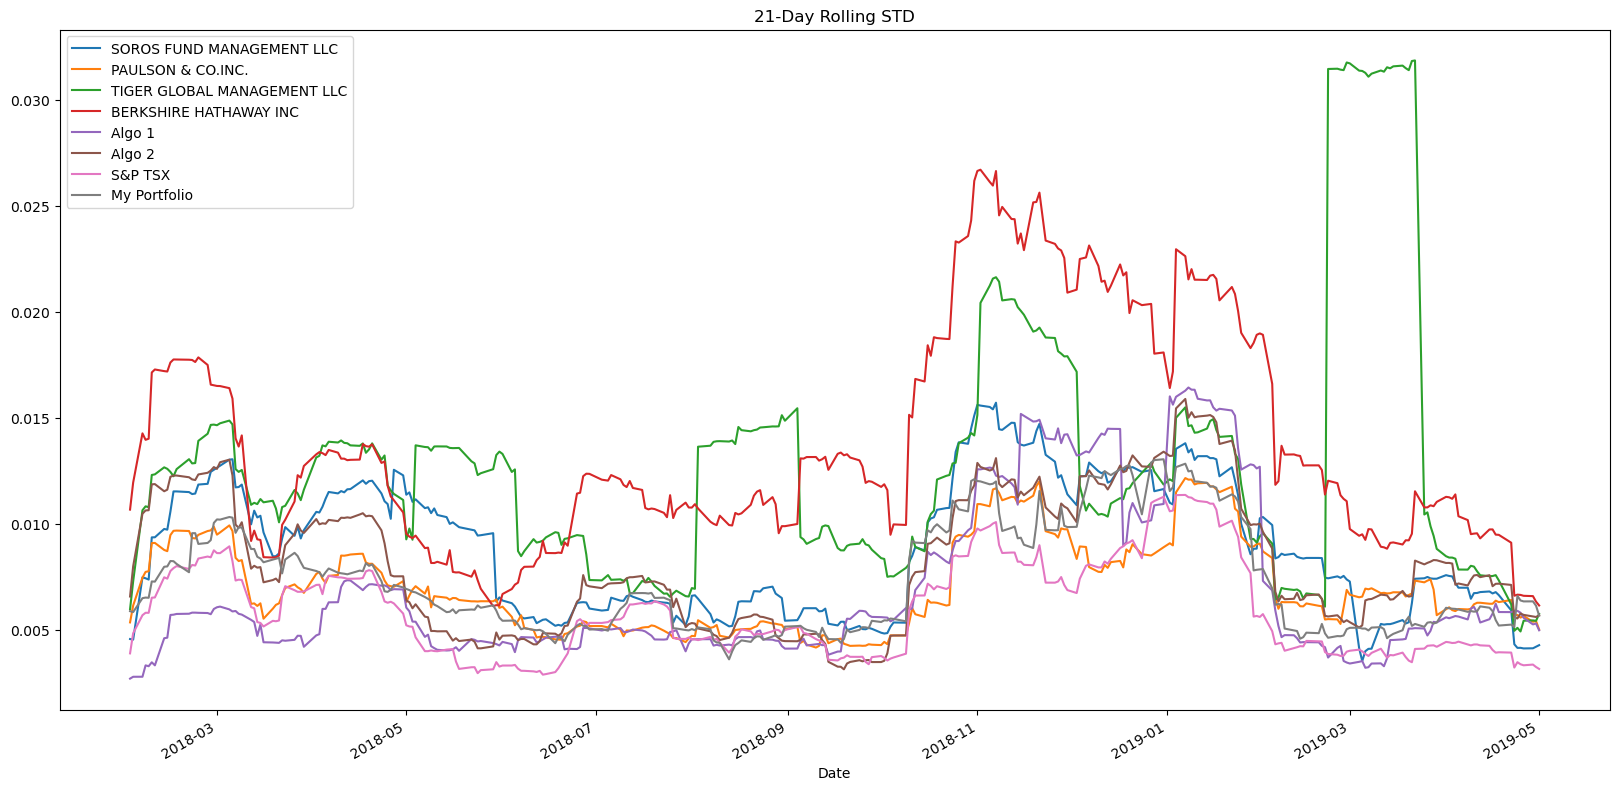

In [41]:
# Calculate rolling standard deviation
combined_rolling_std = combined_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_rolling_std.plot(figsize=(20,10), title='21-Day Rolling STD')

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,NaN,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.523796
PAULSON & CO.INC.,0.764174,NaN,0.536534,0.647407,0.320568,0.797494,0.623728,0.447610
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,NaN,0.384316,0.130845,0.485258,0.438781,0.371361
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,NaN,0.294696,0.783254,0.649817,0.495995
Algo 1,0.305525,0.320568,0.130845,0.294696,NaN,0.321837,0.284789,0.151051
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,NaN,0.754326,0.575784
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,NaN,0.836999
My Portfolio,0.523796,0.447610,0.371361,0.495995,0.151051,0.575784,0.836999,NaN


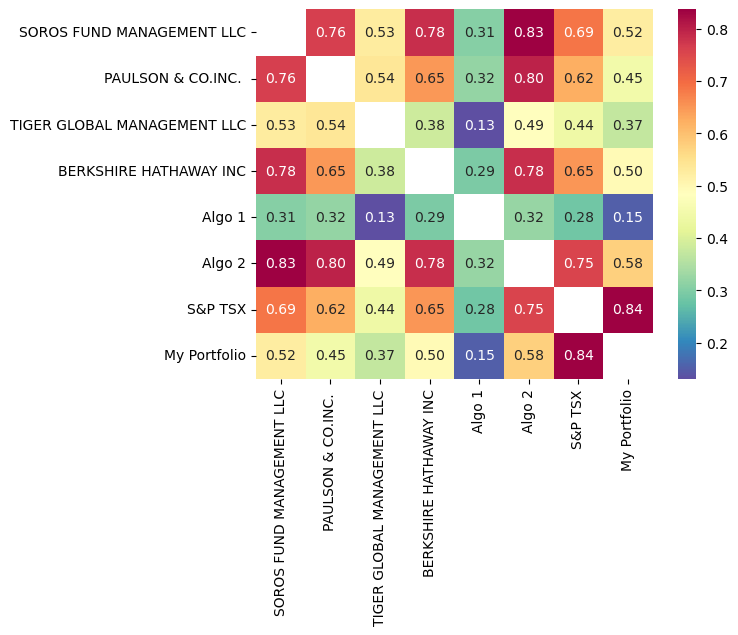

In [42]:
# Calculate and plot the correlation
combined_corr = combined_returns_df.corr()
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
# Don't want to consider self-correlation (diagonal): Set these to NaN in a copy of the correlation matrix
# Min/max values for heatmap are inferred from data (NaN is not considered)
# annotate the heatmap values to 2 decimal places since color shading may be imperceptible
# Choose an appropriate color palette (see seaborn documentation)
combined_corr_no_diag = combined_corr.copy()
np.fill_diagonal(combined_corr_no_diag.values, np.nan)
sns.heatmap(combined_corr_no_diag, annot=True, fmt='.2f', cmap=sns.color_palette('Spectral_r', as_cmap=True))
combined_corr_no_diag

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [43]:
# Calculate the custom portfolio beta (vs. S&P TSX 60)
stocks_cov = combined_returns_df['My Portfolio'].cov(combined_returns_df['S&P TSX'])
sp_var = combined_returns_df['S&P TSX'].var()
stocks_beta = stocks_cov / sp_var
stocks_beta

1.0278915492017042

<AxesSubplot:title={'center':'My Portfolio 60-Day Rolling Beta'}, xlabel='Date,None'>

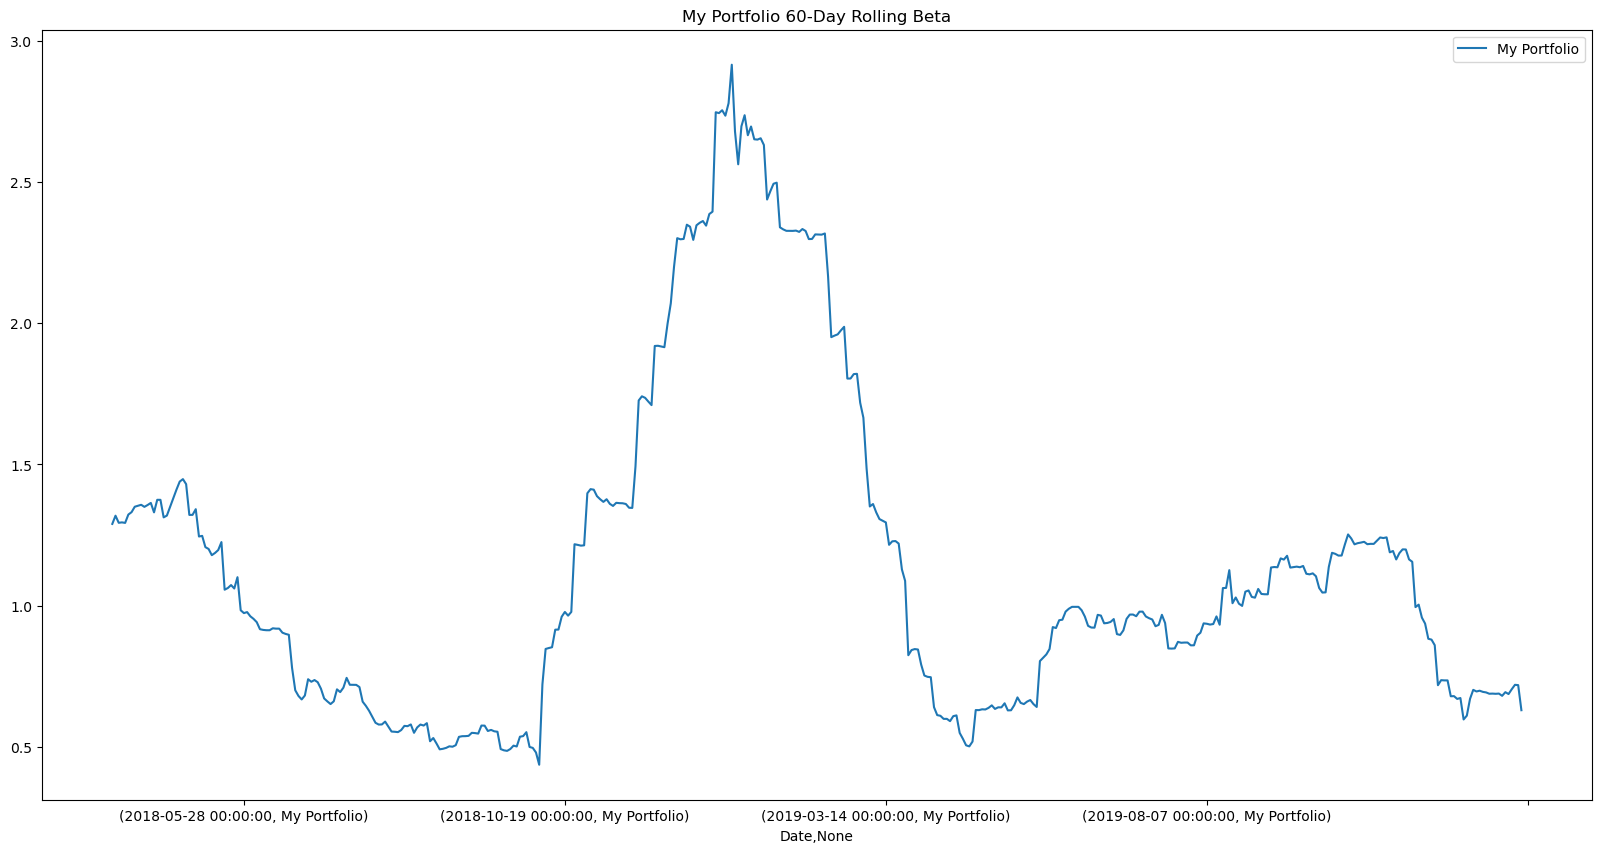

In [44]:
# Calculate and plot Beta
cov_rolling_60day_portfolio_returns = portfolio_returns.rolling(window=60).cov()
beta_portfolio = cov_rolling_60day_portfolio_returns / var_rolling_60day_sp_tsx
beta_portfolio.plot(figsize=(20,10), title='My Portfolio 60-Day Rolling Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
portfolio_sharpe_ratios = sharpe_ratio(combined_returns_df)
portfolio_sharpe_ratios

Algo 1                         1.901461
Algo 2                         0.021394
BERKSHIRE HATHAWAY INC         0.195907
My Portfolio                   0.512992
PAULSON & CO.INC.             -0.396282
S&P TSX                        0.034651
SOROS FUND MANAGEMENT LLC     -0.088196
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for All Portfolios'}>

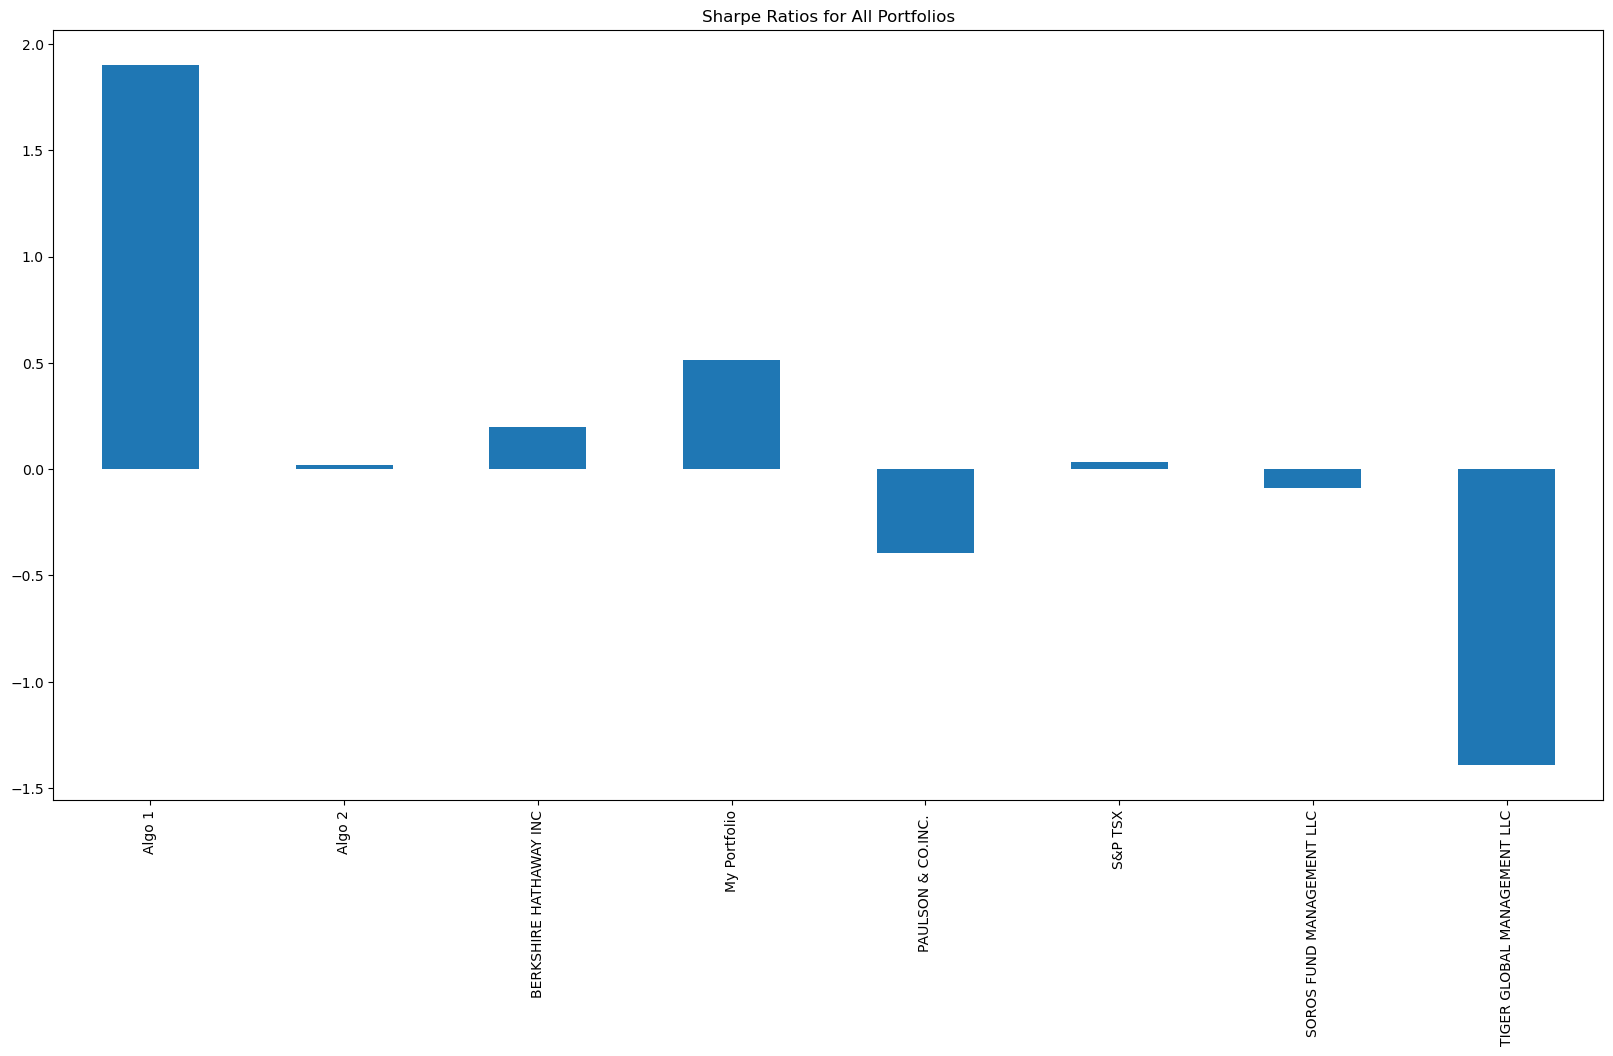

In [46]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios for All Portfolios')

### How does your portfolio do?

#### Correlation
My portfolio tracks closer to the S&P TSX 60 than any other portfolio (0.84) as seen in the correlation heatmap. This indicates a strong positive correlation.

#### Beta
My portfolio's beta over time has fluctuated above and below 1 as seen in the plot of "My Portfolio 60-Day Rolling Beta". Its beta is 1.027, meaning that is was 0.027% more volatile than the market (S&P TSX 60), which is quite low.

#### Sharpe Ratio
My portfolio has the 2nd highest Sharpe Ratio at 0.51, which indicates that it has less risk than the market and Whales portfolio. However, it has more risk than Algo1.

#### Conclusion
My portfolio is a good performer amongst the Whales portfolios and Algos. It delivers less risk than most other portfolios and is only slightly more volatile than the market.